In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumSquareRound'

In [77]:
population = pd.read_csv("people.csv", thousands=',')

In [78]:
population.head(10)

,행정구역,2008년_총인구수,2008년_세대수,2008년_세대당 인구,2008년_남자 인구수,2008년_여자 인구수,2008년_남여 비율,2009년_총인구수,2009년_세대수,2009년_세대당 인구,...,2016년_세대당 인구,2016년_남자 인구수,2016년_여자 인구수,2016년_남여 비율,2017년_총인구수,2017년_세대수,2017년_세대당 인구,2017년_남자 인구수,2017년_여자 인구수,2017년_남여 비율
0,전국,49540367,19005339,2.61,24822897,24717470,1.00,49773145.0,19261292.0,2.58,...,2.43,25827594,25868622,1.00,51778544,21632851,2.39,25855919,25922625,1.00
1,서울,10200827,4097562,2.49,5061809,5139018,0.98,10208302.0,4116660.0,2.48,...,2.37,4876789,5053827,0.96,9857426,4220082,2.34,4830206,5027220,0.96
2,부산,3564577,1311724,2.72,1773154,1791423,0.99,3543030.0,1323771.0,2.68,...,2.41,1725607,1772922,0.97,3470653,1467555,2.36,1709508,1761145,0.97
3,대구,2492724,894969,2.79,1246873,1245851,1.00,2489781.0,906470.0,2.75,...,2.50,1234169,1250388,0.99,2475231,1006753,2.46,1227814,1247417,0.98
4,인천,2692696,1014755,2.65,1356473,1336223,1.02,2710579.0,1026936.0,2.64,...,2.51,1477671,1465398,1.01,2948542,1188917,2.48,1479597,1468945,1.01
5,광주,1422702,513021,2.77,705817,716885,0.98,1433640.0,524093.0,2.74,...,2.51,728137,741077,0.98,1463770,592818,2.47,725295,738475,0.98
6,대전,1480895,531682,2.79,741611,739284,1.00,1484180.0,538100.0,2.76,...,2.50,757289,757081,1.00,1502227,614639,2.44,750969,751258,1.00
7,울산,1112407,389735,2.85,572815,539592,1.06,1114866.0,394364.0,2.83,...,2.57,603797,568507,1.06,1165132,458547,2.54,599480,565652,1.06
8,세종,0,0,0.00,0,0,0.00,NaN,NaN,NaN,...,2.58,121505,121543,1.00,280100,109490,2.56,139734,140366,1.00
9,경기,11292264,4284475,2.64,5690673,5601591,1.02,11460610.0,4359467.0,2.63,...,2.54,6395453,6321327,1.01,12873895,5131379,2.51,6475323,6398572,1.01


In [79]:
y2011_data = pd.melt(population, id_vars=['행정구역'], value_vars=['2011년_총인구수'], var_name='년도', value_name="인구수")

In [80]:
y2011_data_m = pd.melt(population, id_vars=['행정구역'], value_vars=['2011년_남자 인구수'], var_name='년도', value_name="남자")

In [81]:
y2011_data_f = pd.melt(population, id_vars=['행정구역'], value_vars=['2011년_남자 인구수'], var_name='년도', value_name="여자")

In [82]:
y2011_data.년도 = 2011
y2011_data_m.년도 = 2011
y2011_data_f.년도 = 2011

In [83]:
y2011_am = pd.merge(y2011_data, y2011_data_m, on=['행정구역', '년도'])

In [84]:
y2011_amf = pd.merge(y2011_am, y2011_data_f, on=['행정구역', '년도'], how="inner")

In [85]:
y2011_amf

,행정구역,년도,인구수,남자,여자
0,전국,2011,50734284.0,25406934.0,25406934.0
1,서울,2011,10249679.0,5073899.0,5073899.0
2,부산,2011,3550963.0,1762848.0,1762848.0
3,대구,2011,2507271.0,1251577.0,1251577.0
4,인천,2011,2801274.0,1410980.0,1410980.0
5,광주,2011,1463464.0,725606.0,725606.0
6,대전,2011,1515603.0,759188.0,759188.0
7,울산,2011,1135494.0,583825.0,583825.0
8,세종,2011,NaN,NaN,NaN
9,경기,2011,11937415.0,6015357.0,6015357.0


In [86]:
def calc(year):
    df_by_year = pd.melt(population, id_vars=['행정구역'], value_vars=[str(year) + '년_총인구수'], var_name='년도', value_name="인구수")
    df_by_year.년도 = year
    
    df_by_year_m = pd.melt(population, id_vars=['행정구역'], value_vars=[str(year) + '년_남자 인구수'], var_name='년도', value_name="남자")
    df_by_year_m.년도 = year
    
    df_by_year_f = pd.melt(population, id_vars=['행정구역'], value_vars=[str(year) + '년_여자 인구수'], var_name='년도', value_name="여자")
    df_by_year_f.년도 = year

    df_merged = pd.merge(pd.merge(df_by_year, df_by_year_m, on=['행정구역', '년도'], how='inner'), df_by_year_f, on=['행정구역', '년도'], how='inner')

    globals()['df_{}_all'.format(year)] = df_merged

In [87]:
for i in range(2008, 2018):
    calc(i)

In [88]:
df_all = df_2008_all

In [89]:
for n in range(2008, 2018):
    df_all = pd.concat([df_all, globals()["df_{}_all".format(n)]])

In [90]:
df_all

,행정구역,년도,인구수,남자,여자
0,전국,2008,49540367.0,24822897.0,24717470.0
1,서울,2008,10200827.0,5061809.0,5139018.0
2,부산,2008,3564577.0,1773154.0,1791423.0
3,대구,2008,2492724.0,1246873.0,1245851.0
4,인천,2008,2692696.0,1356473.0,1336223.0
...,...,...,...,...,...
13,전북,2017,1854607.0,922307.0,932300.0
14,전남,2017,1896424.0,948290.0,948134.0
15,경북,2017,2691706.0,1353164.0,1338542.0
16,경남,2017,3380404.0,1701413.0,1678991.0


<AxesSubplot:xlabel='년도', ylabel='인구수'>

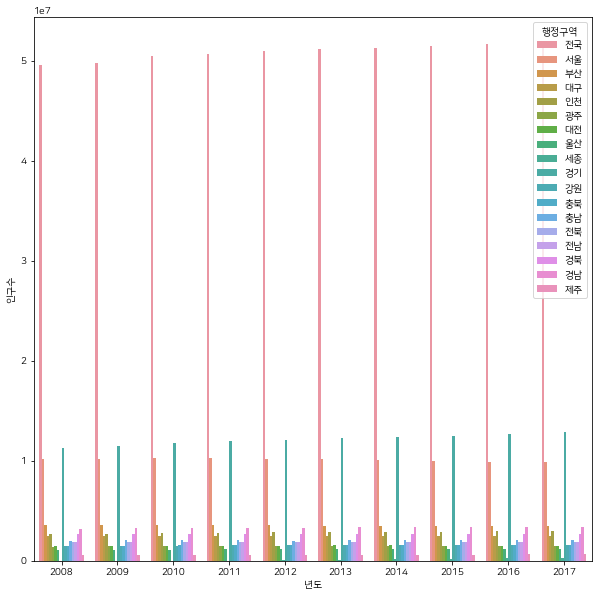

In [95]:
plt.figure(figsize=(10, 10))
sns.barplot(x='년도', y='인구수', data=df_all, hue="행정구역")